TP3 - Pandas - Josué BAQUERO

On importe les bibliothèques nécessaires:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

On charge les données des élections:

In [2]:
data = pd.read_csv("elections-presidentielles-2017-1ertour.csv", sep=';')
print("Aperçu des données:")
print(data.head())

Aperçu des données:
  ID_BVOTE         SCRUTIN  ANNEE  TOUR        DATE  NUM_CIRC  NUM_QUARTIER  \
0    15-49  Présidentielle   2017     1  2007-04-23        13            57   
1    15-51  Présidentielle   2017     1  2007-04-23        13            57   
2    15-77  Présidentielle   2017     1  2007-04-23        13            58   
3    16-42  Présidentielle   2017     1  2007-04-23        14            63   
4    16-55  Présidentielle   2017     1  2007-04-23         4            64   

   NUM_ARROND  NUM_BUREAU  NB_PROCU  ...  HAMON Benoît  ARTHAUD Nathalie  \
0          15          49        32  ...           107                 7   
1          15          51        68  ...           126                 7   
2          15          77        55  ...            90                 4   
3          16          42        60  ...            29                 2   
4          16          55        98  ...            27                 0   

   POUTOU Philippe  CHEMINADE Jacques  LASSALLE 

## 1. Extraction des voix de Mélenchon

In [3]:
melenchon_voix = data['MÉLENCHON Jean-Luc']
print("Nombre de voix de Mélenchon par bureau:")
print(melenchon_voix)

Nombre de voix de Mélenchon par bureau:
0      272
1      168
2      224
3       49
4       44
      ... 
891    502
892    304
893    289
894    312
895    332
Name: MÉLENCHON Jean-Luc, Length: 896, dtype: int64


## 2. Histogramme des voix de Mélenchon

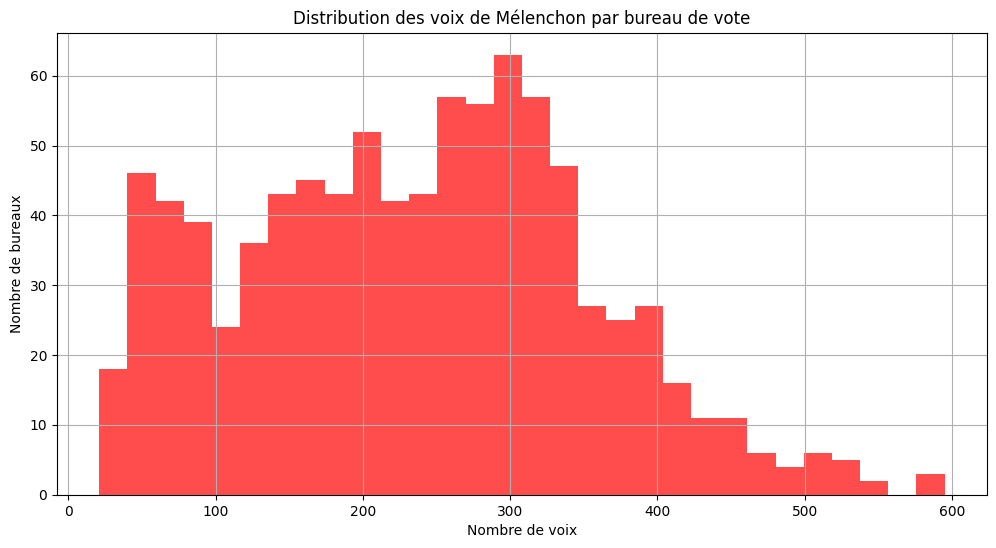

In [4]:
plt.figure(figsize=(12, 6))
plt.hist(melenchon_voix, bins=30, color='red', alpha=0.7)
plt.title('Distribution des voix de Mélenchon par bureau de vote')
plt.xlabel('Nombre de voix')
plt.ylabel('Nombre de bureaux')
plt.grid(True)

## 3. Nombre de bureaux par arrondissement

In [5]:
bureaux_par_arrond = data.groupby('NUM_ARROND')['NUM_BUREAU'].count()
print("Nombre de bureaux de vote par arrondissement:")
print(bureaux_par_arrond)

Nombre de bureaux de vote par arrondissement:
NUM_ARROND
1     10
2     10
3     15
4     14
5     25
6     22
7     25
8     18
9     27
10    39
11    55
12    64
13    71
14    57
15    95
16    68
17    67
18    68
19    70
20    76
Name: NUM_BUREAU, dtype: int64


## 4. Voix de Benoît Hamon par bureau

In [6]:
hamon_voix = data[['NUM_BUREAU', 'HAMON Benoît']]
print("Voix de Benoît Hamon par bureau:")
print(hamon_voix)

Voix de Benoît Hamon par bureau:
     NUM_BUREAU  HAMON Benoît
0            49           107
1            51           126
2            77            90
3            42            29
4            55            27
..          ...           ...
891          64           145
892          67           163
893          24           129
894          21           125
895          33           109

[896 rows x 2 columns]


## 5. Voix par candidat et arrondissement

In [7]:
candidats = ['LE PEN Marine', 'MACRON Emmanuel', 'MÉLENCHON Jean-Luc', 'FILLON François',
             'HAMON Benoît', 'DUPONT-AIGNAN Nicolas', 'ARTHAUD Nathalie', 'POUTOU Philippe',
             'CHEMINADE Jacques', 'LASSALLE Jean', 'ASSELINEAU François']

voix_par_arrond = data.groupby('NUM_ARROND')[candidats].sum()
print("Voix par candidat et arrondissement:")
print(voix_par_arrond)

Voix par candidat et arrondissement:
            LE PEN Marine  MACRON Emmanuel  MÉLENCHON Jean-Luc  \
NUM_ARROND                                                       
1                     443             3561                1231   
2                     399             5013                1802   
3                     615             8325                3078   
4                     735             6182                2329   
5                    1225            12316                4960   
6                     719             8729                2038   
7                    1064             8785                1552   
8                     916             6568                1392   
9                    1092            14029                4783   
10                   1817            16880               11396   
11                   3035            29191               17877   
12                   4385            26942               15613   
13                   5745            30

## 6. Visualisation des principaux candidats par arrondissement

<Figure size 1500x700 with 0 Axes>

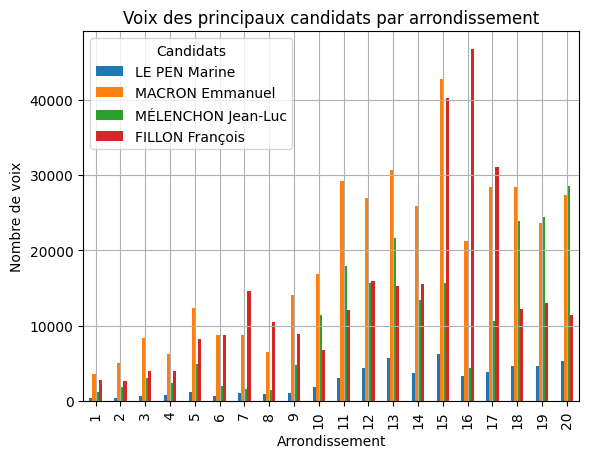

In [12]:
# Extraction des données des 4 principaux candidats
principaux_candidats = ['LE PEN Marine', 'MACRON Emmanuel', 'MÉLENCHON Jean-Luc', 'FILLON François']
voix_principaux = data.groupby('NUM_ARROND')[principaux_candidats].sum()

# 1. Graphique en barres
plt.figure(figsize=(15, 7))
voix_principaux.plot(kind='bar')
plt.title('Voix des principaux candidats par arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Nombre de voix')
plt.legend(title='Candidats')
plt.grid(True)
plt.xticks(np.arange(20), np.arange(1, 21))
plt.show()

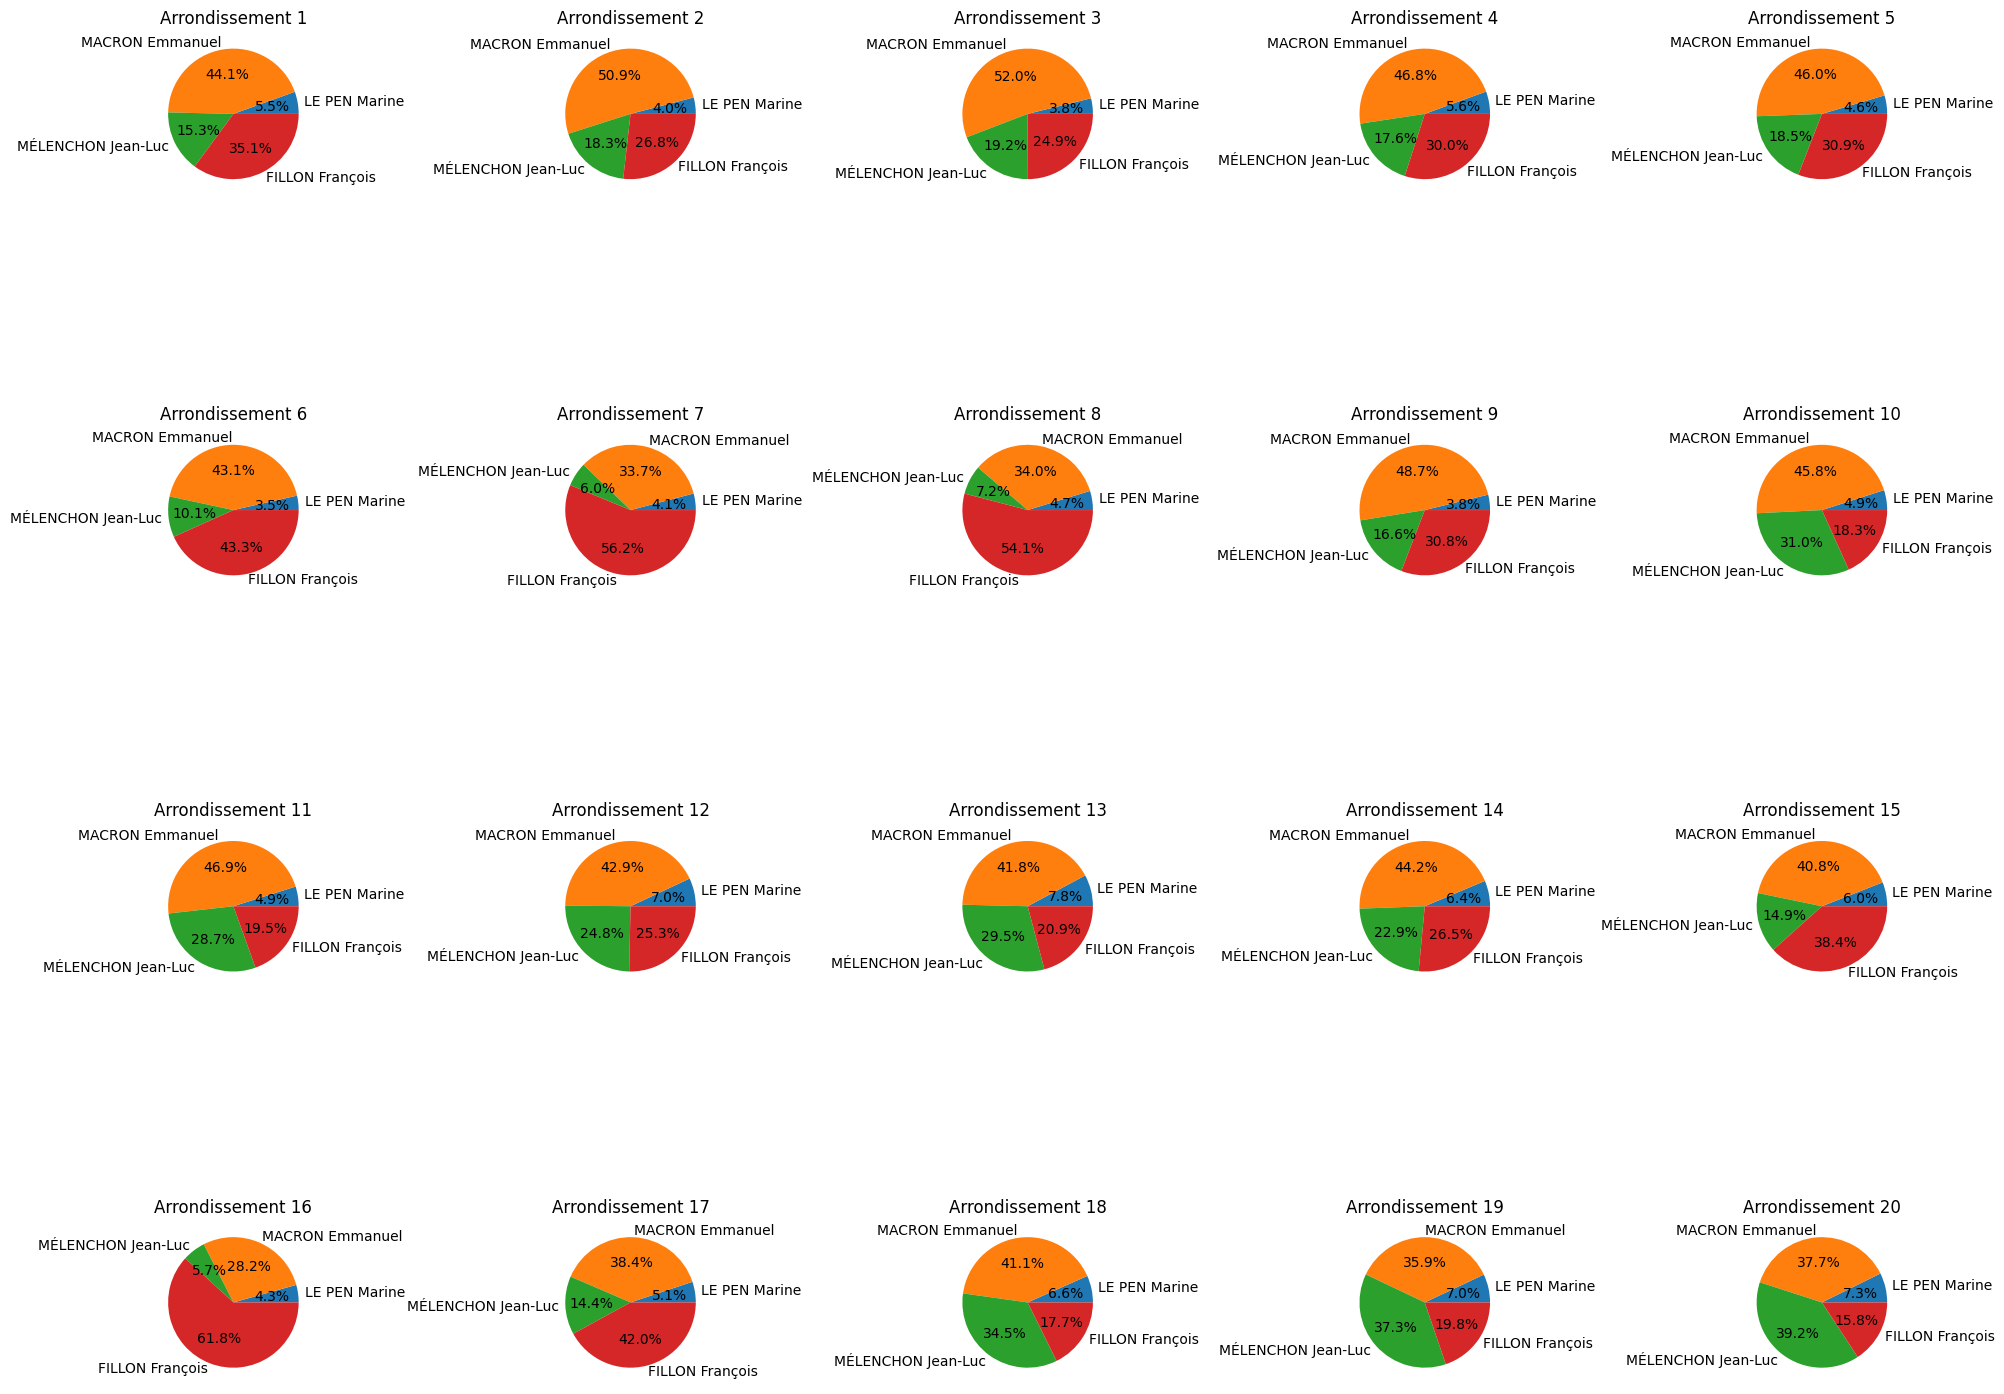

In [ ]:
# 2. Graphiques en camembert (un par arrondissement)
# On va faire une grille de 4x5 camemberts
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.ravel()  # Aplatir le tableau d'axes pour faciliter l'itération

for i, arrond in enumerate(range(1, 21)):
    data_arr = voix_principaux.loc[arrond]
    axes[i].pie(data_arr, labels=principaux_candidats, autopct='%1.1f%%')
    axes[i].set_title(f'Arrondissement {arrond}')

plt.tight_layout()
plt.show()

La représentation en barres est plus adaptée car elle permet de comparer facilement les valeurs absolues entre arrondissements

## 7. Analyses supplémentaires

### Taux de participation par arrondissement

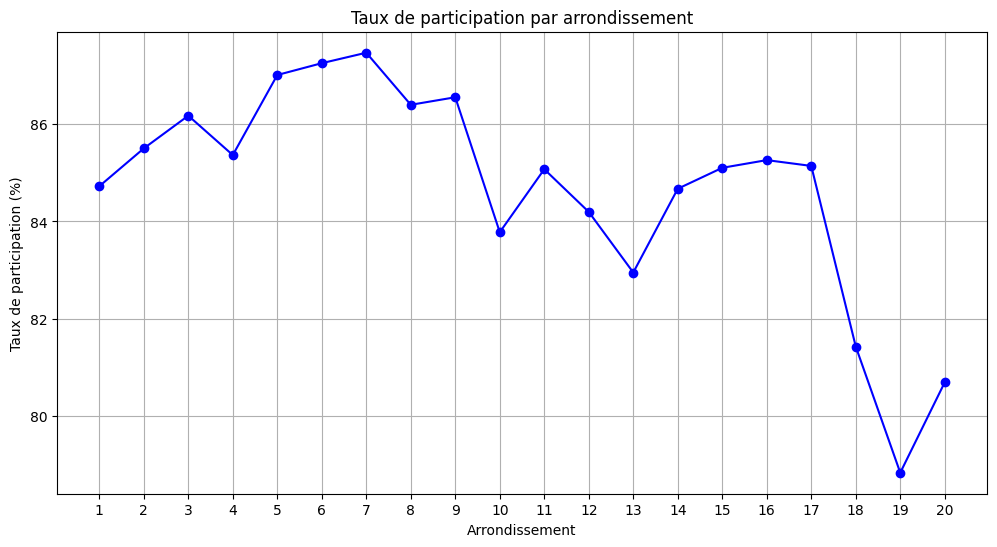

In [9]:
participation = data.groupby('NUM_ARROND').agg({
    'NB_INSCR': 'sum',
    'NB_VOTANT': 'sum'
})

x = np.arange(1, 21)  # De 1 à 20
participation['taux_participation'] = (participation['NB_VOTANT'] / participation['NB_INSCR']) * 100

plt.figure(figsize=(12, 6))
plt.plot(participation.index, participation['taux_participation'], 'bo-')
plt.title('Taux de participation par arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Taux de participation (%)')
plt.grid(True)
# Définir des ticks entiers pour les arrondissements
plt.xticks(x);  # point virgule pour éviter l'affichage technique de cette fonction

### Votes blancs et nuls par arrondissement

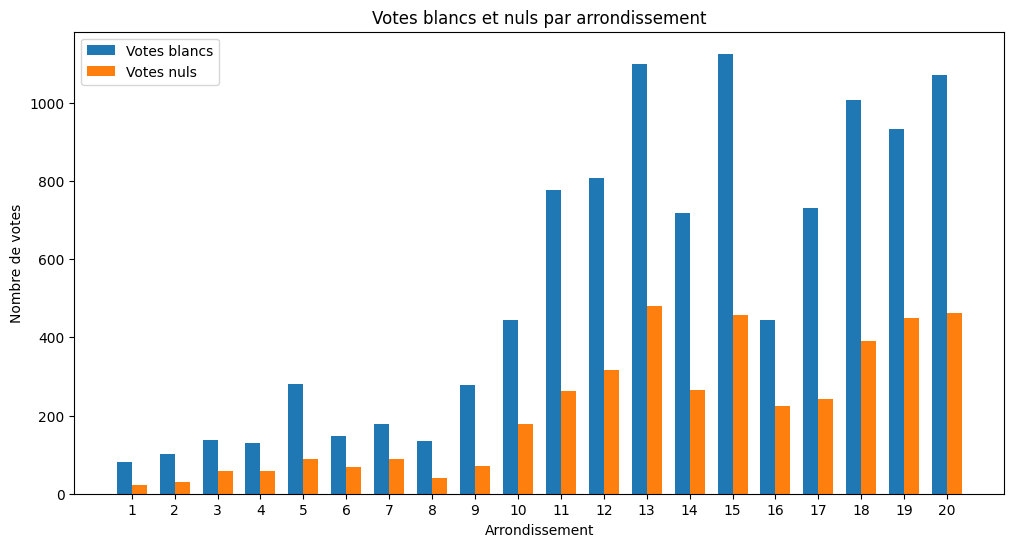

In [10]:
votes_invalides = data.groupby('NUM_ARROND').agg({
    'NB_BL': 'sum',
    'NB_NUL': 'sum'
})

x = np.arange(1, 21)  # De 1 à 20
width = 0.35  # Largeur des barres

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, votes_invalides['NB_BL'], width, label='Votes blancs')
plt.bar(x + width/2, votes_invalides['NB_NUL'], width, label='Votes nuls')
plt.title('Votes blancs et nuls par arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Nombre de votes')
plt.legend()
plt.xticks(x);  # Utiliser seulement les nombres entiers